<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

#1 Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [ ]:
%cd /content/drive/MyDrive/ProCvYolo

/content/drive/MyDrive/ProCvYolo


In [ ]:
%ls

Copie_de_YOLOv8_Tutorial.ipynb  README.dataset.txt   train/      yolov8n.pt
datasets/                       README.roboflow.txt  valid/      yolov8s.pt
data.yaml                       runs/                yolov8m.pt


In [12]:
%pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
%ls

Copie_de_YOLOv8_Tutorial.ipynb  README.dataset.txt   train/      yolov8n.pt
datasets/                       README.roboflow.txt  valid/      yolov8s.pt
data.yaml                       runs/                yolov8m.pt


In [17]:
pip install pdf2image

In [18]:
import ultralytics
ultralytics.checks()
from IPython.display import display, Image
from IPython.display import Image
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
import numpy as np
from pdf2image import convert_from_path
import numpy as np
from PIL import Image
from IPython.display import display


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


# 2. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
%ls

Copie_de_YOLOv8_Tutorial.ipynb  README.dataset.txt   runs/   valid/
data.yaml                       README.roboflow.txt  train/  yolov8m.pt


In [ ]:
# Download COCO val

import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:06<00:00, 127MB/s]


In [ ]:
!nvidia-smi

Mon Dec 11 12:32:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ProCvYolo

/content/drive/MyDrive/ProCvYolo


In [15]:
# Train YOLOv8n on COCO8 for 50 epochs
!yolo train model=yolov8s.pt data=/content/drive/MyDrive/ProCvYolo/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/ProCvYolo/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

In [ ]:
%ls

Copie_de_YOLOv8_Tutorial.ipynb  README.dataset.txt   train/      yolov8n.pt
datasets/                       README.roboflow.txt  valid/      yolov8s.pt
data.yaml                       runs/                yolov8m.pt


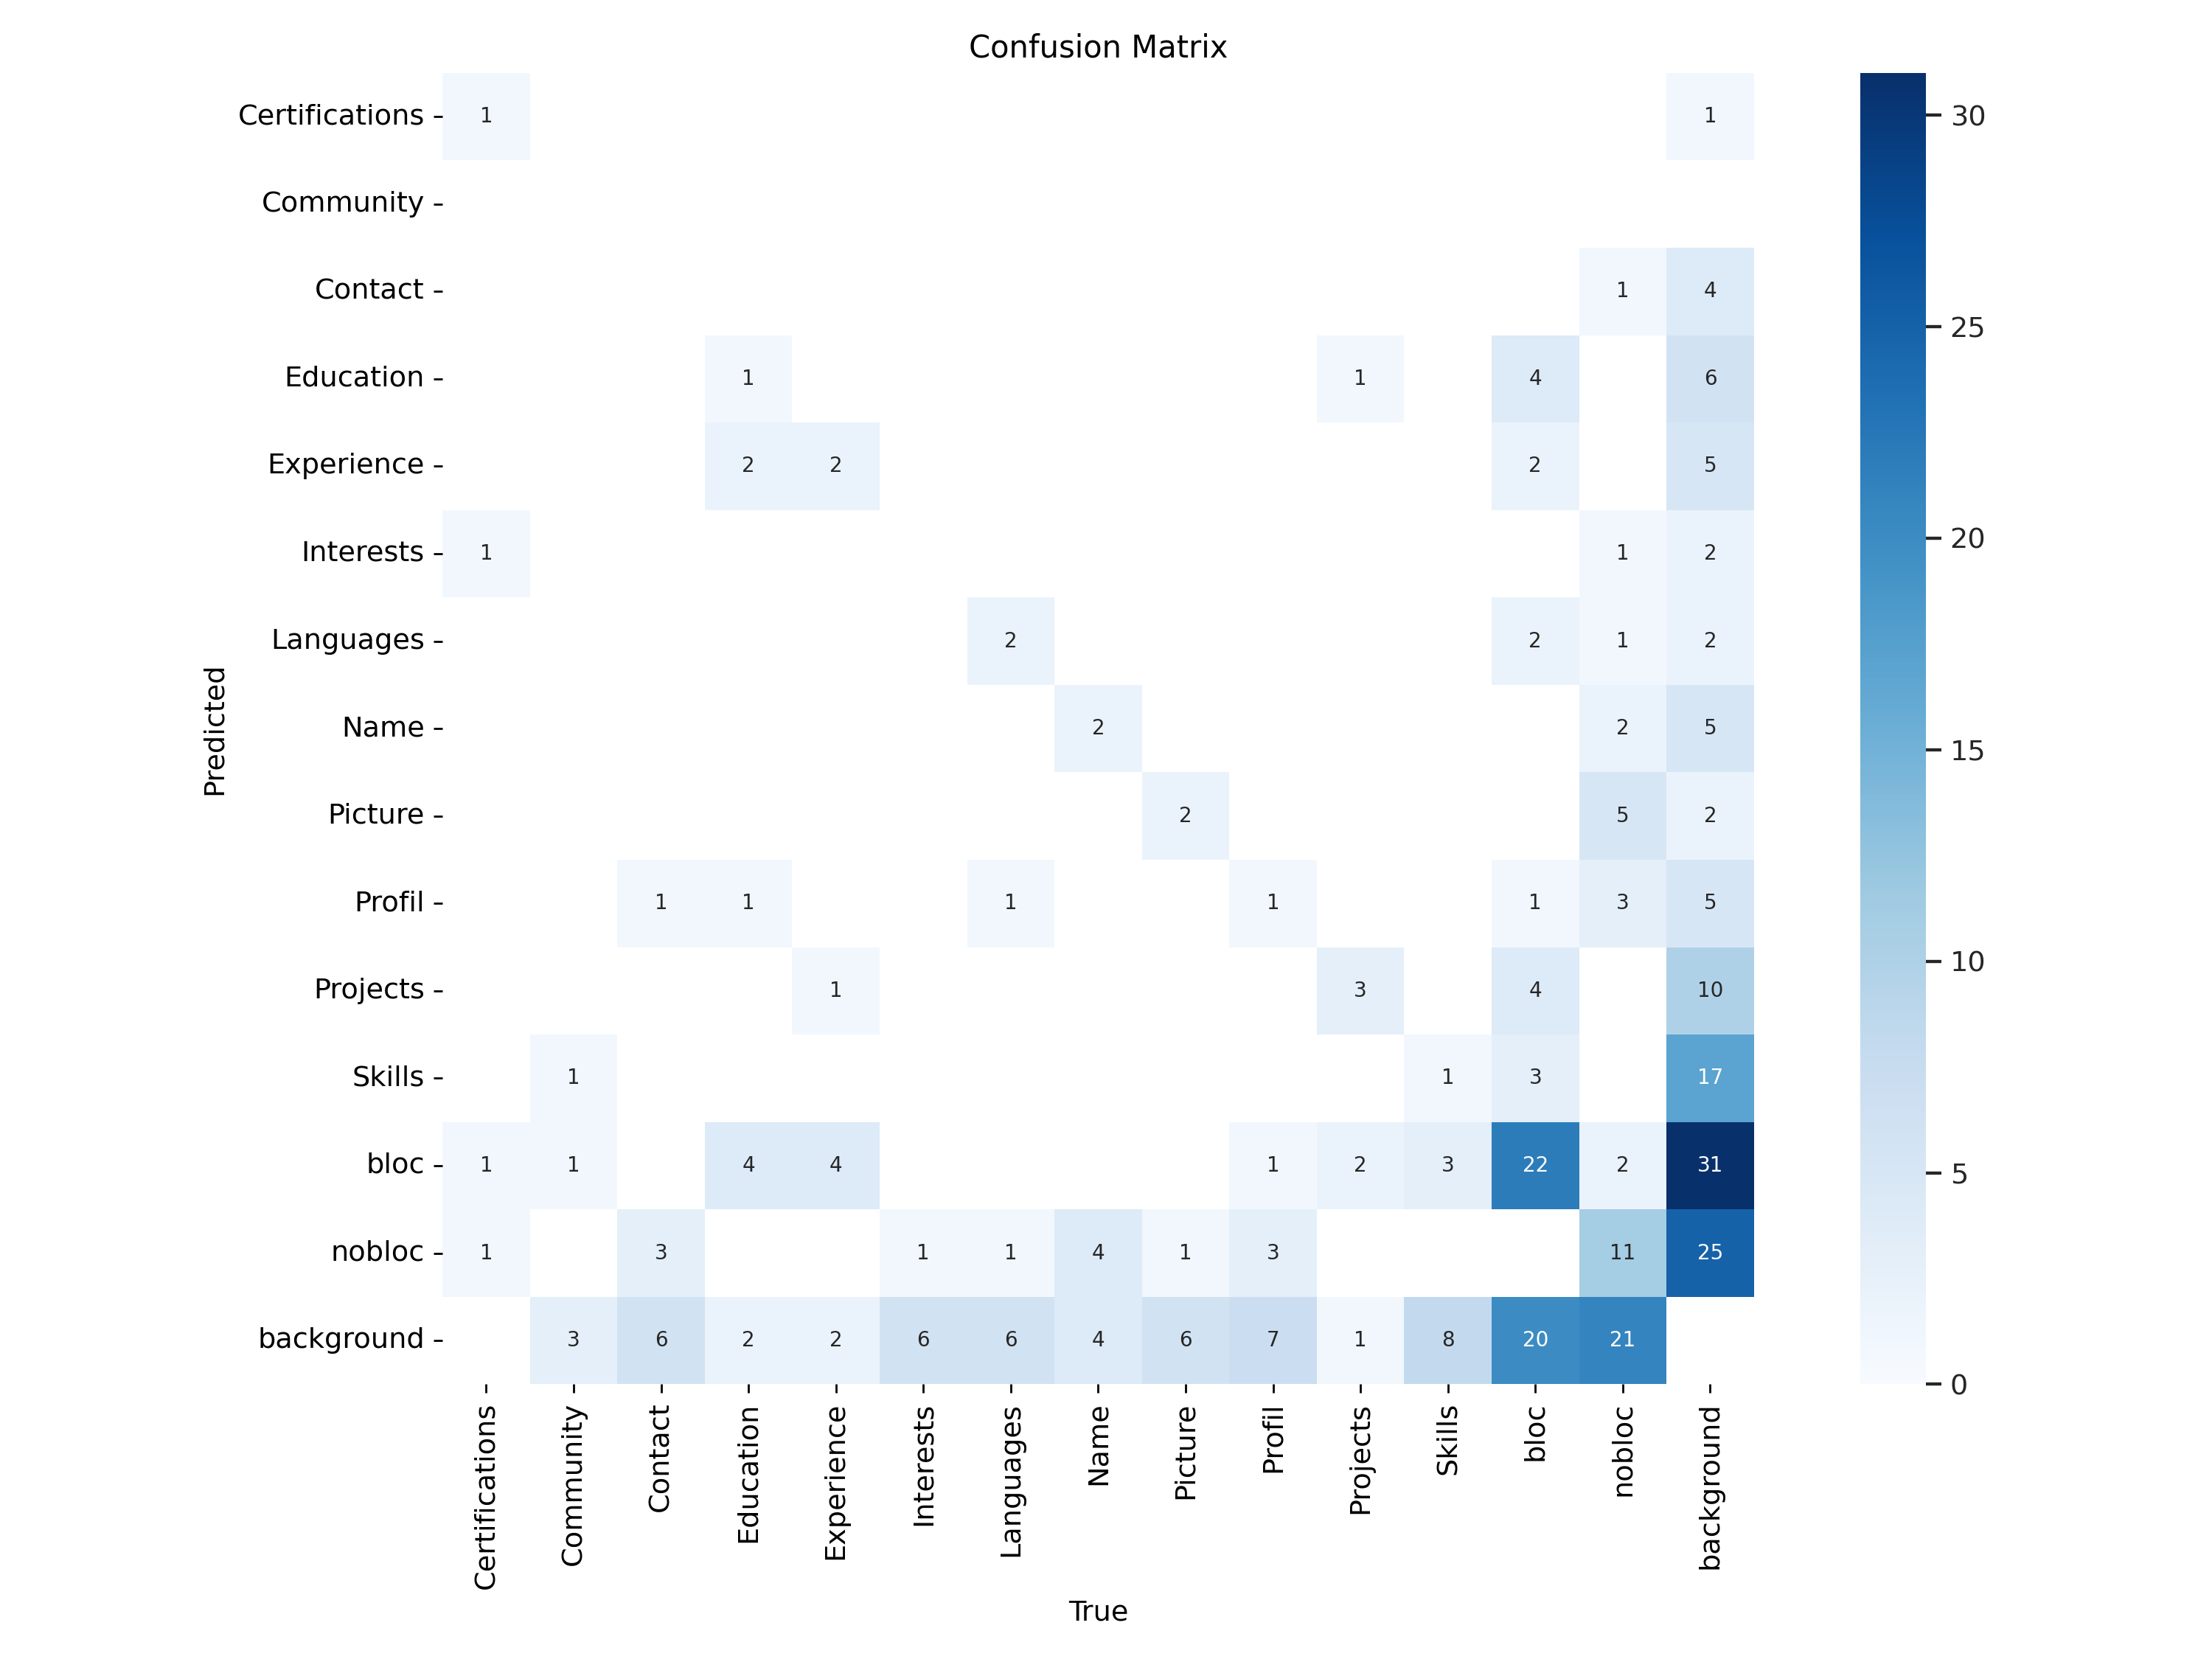

In [23]:
# Charger et afficher l'image
img_path = 'runs/detect/train6/confusion_matrix.png'
img = Image.open(img_path)
display(img)

In [25]:
# Charger et afficher l'image
img_path = 'runs/detect/train6/val_batch0_pred.jpg'
img = Image.open(img_path)
display(img)

Output hidden; open in https://colab.research.google.com to view.

# 2. Validation

In [ ]:
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=/content/drive/MyDrive/ProCvYolo/data.yaml

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 23.6MB/s]
val: Scanning /content/drive/MyDrive/ProCvYolo/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:04<00:00,  4.94s/it]
                   all         10        210      0.661      0.593      0.644      0.453
        Certifications         10          4       0.27       0.25      0.326      0.151
             Community         10          5          1          0       0.36      0.294
               Contact         10         10      0.735        0.5      0.625      0.407
             Education         10         10      0.705          1      0.938      0.735
            Experience         10          9      0.537          1      0.915      0.762


# 4. Exploration

In [ ]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (217 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
def convert_pdf_to_image(pdf_path, output_format='JPEG'):
    images = convert_from_path(pdf_path, fmt=output_format)

    # Vérifier si des images ont été extraites
    if images:
        # Convertir la première image en tableau Numpy
        img = np.array(images[0])

        # Pour chaque image supplémentaire, concaténer le tableau Numpy
        for i in range(1, len(images)):
            img = np.concatenate((img, np.array(images[i])), axis=1)

        return img

    return None



In [ ]:
# Convertir le PDF en image
pdf_path = '/content/CV_Emine_Youbah.pdf'
output_folder = '/content/output'
image = convert_pdf_to_image(pdf_path)

# Assurez-vous que la conversion en tableau Numpy a réussi
if image is not None:
    # Convertir l'image PIL en tableau NumPy
    r = np.array(image)

    # !yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source='test/images/1ab1badf-7a21-4be2-afc3-8ab04d908568_jpg.rf.8b933d6d5a34720ed33e819bb86f425a.jpg'
    model = YOLO("runs/detect/train5/weights/best.pt")
    model.predict(r, save=True,save_crop=True, classes=[0,1,2,3,4,5,6,7,8,9,10,11])
else:
    print("La conversion du PDF en image a échoué.")





0: 640x480 1 Contact, 2 Educations, 1 Languages, 1 Name, 2 Pictures, 2 Profils, 1 Skills, 13.3ms
Speed: 3.7ms preprocess, 13.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4


In [ ]:
model = YOLO("runs/detect/train5/weights/best.pt")
model.predict(source="/content/jj.jpg", save=True, save_crop=True, classes=[0,1,2,3,4,5,6,7,8,9,10,11])
chem = model.save_dir


# Text extraction

In [ ]:
%cd /content/drive/MyDrive/ProCvYolo

/content/drive/MyDrive/ProCvYolo


In [ ]:
pip install Pillow pytesseract


In [ ]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,875 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
def clean_and_format_text(text):
    # Supprimer les caractères non imprimables
    cleaned_text = ''.join(char for char in text if char.isprintable())

    # Remplacer les séquences de saut de ligne par des espaces
    cleaned_text = cleaned_text.replace('\n', ' ')

    # Supprimer les espaces multiples
    cleaned_text = ' '.join(cleaned_text.split())

    return cleaned_text

In [ ]:
from PIL import Image
import pytesseract

def extract_text_from_images(image_paths):
    try:
        extracted_texts = []

        for image_path in image_paths:
            # Ouvrir l'image à l'aide de PIL (Pillow)
            image = Image.open(image_path)

            # Utiliser pytesseract pour extraire le texte
            extracted_text = pytesseract.image_to_string(image)

            # Ajouter le texte extrait à la liste
            extracted_texts.append(extracted_text)

        return extracted_texts
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")
        return None

# Exemple d'utilisation
image_paths_list = ['/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Profil/image0.jpg', '/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Profil/image02.jpg']
result_texts_list = extract_text_from_images(image_paths_list)

# Appliquer la fonction de nettoyage et de formatage à chaque texte
cleaned_and_formatted_texts = [clean_and_format_text(text) for text in result_texts_list]

# Afficher les résultats optimisés
for i, text in enumerate(cleaned_and_formatted_texts, start=1):
    print(f'Texte {i}: {text}\n')


Texte 1: ETUDIANT EN DEUXIEME ANNEE DE MASTER DATASCIENCE AND SOFTWARE DEVELOPPEMENT , AVECUNE SOLIDE FORMATION EN MATHEMATIQUES,INFORMATIQUE ET INTELLIGENCE ARTIFICIELLE, JEPOSSEDE DES COMPETENCES APPROFONDIES POURAPPLIQUER DES CONCEPTS DE SCIENCE DESDONNEES ET DEVELOPPER DES SOLUTIONSLOGICIELLES DANS DIVERS DOMAINES.

Texte 2: Etudiant en Data Science andSoftware Développement



In [ ]:
import os

def build_image_dictionary(parent_folder):
    # Initialiser le dictionnaire
    image_dict = {}

    # Liste des fichiers dans le dossier parent
    files = os.listdir(parent_folder)

    # Parcourir chaque fichier
    for file in files:
        file_path = os.path.join(parent_folder, file)

        # Vérifier si c'est un dossier
        if os.path.isdir(file_path):
            # Liste des images dans le dossier
            images = [os.path.join(file_path, image) for image in os.listdir(file_path) if image.lower().endswith(('.png', '.jpg', '.jpeg'))]

            # Si le dossier a des images, ajouter au dictionnaire
            if images:
                # Utiliser le nom du dossier comme clé
                if file != "Picture":
                  image_dict[file] = images

    return image_dict







In [ ]:
# Exemple d'utilisation
parent_folder_path = '/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops'
result_dict = build_image_dictionary(parent_folder_path)

# Afficher le dictionnaire résultant
for key, value in result_dict.items():
    print(f"{key}: {value}")

Profil: ['/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Profil/image0.jpg', '/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Profil/image02.jpg']
Contact: ['/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Contact/image0.jpg']
Education: ['/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Education/image0.jpg', '/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Education/image02.jpg']
Languages: ['/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Languages/image0.jpg']
Skills: ['/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Skills/image0.jpg']
Name: ['/content/drive/MyDrive/ProCvYolo/runs/detect/predict4/crops/Name/image0.jpg']


In [ ]:
# Afficher le dictionnaire résultant
dict={}
for key, value in result_dict.items():
    result_texts_list=extract_text_from_images(value)
    cleaned_and_formatted_texts = [clean_and_format_text(text) for text in result_texts_list]
    textfi = str(cleaned_and_formatted_texts)
    dict[key] = textfi


# Afficher les résultats optimisés
for key, text in dict.items():
    print(f'"{key}": {text}\n')


"Profil": ['ETUDIANT EN DEUXIEME ANNEE DE MASTER DATASCIENCE AND SOFTWARE DEVELOPPEMENT , AVECUNE SOLIDE FORMATION EN MATHEMATIQUES,INFORMATIQUE ET INTELLIGENCE ARTIFICIELLE, JEPOSSEDE DES COMPETENCES APPROFONDIES POURAPPLIQUER DES CONCEPTS DE SCIENCE DESDONNEES ET DEVELOPPER DES SOLUTIONSLOGICIELLES DANS DIVERS DOMAINES.', 'Etudiant en Data Science andSoftware Développement']

"Contact": ['re) +216- 53672748© emine.youbah@esen.tni https://www.linkedin.com/in/emine-youbah/Qe LA MANOUBA, Manouba, Tunisie']

"Education": ["(2018-2019)BACCALAUREAT EN SCIENCE NATURELLEEcole Enes Ibn Malek, , Mauritanie( 2019-2022 )LICENCE EN INFORMATIQUESUniversité libanaise internationale en Mauritanie (LIU)( 2022-Now )MASTER EN DATA SCIENCE AND SOFTWARE DEVELOPPEMENTEcole Supérieure de I'Economie Numérique (ESEN), Tunisie", "¢ Projet en Mai 2022 (PFE): Systeme de Gestion de CabinetDentaire Un logiciel complet développé avec Java, Swing,etMySQL.¢ Projet en Janvier 2023 : Application Web JEE GestionBibliot